In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/us-accidents/US_Accidents_March23.csv


In [2]:
!ls ../input/us-accidents

US_Accidents_March23.csv


In [3]:
# import all necesary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patches as mpatches
%matplotlib inline
import seaborn as sns
import calendar
import plotly as pt
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from pylab import *
import matplotlib.patheffects as PathEffects

import descartes
import geopandas as gpd
from Levenshtein import distance
from itertools import product
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
from scipy.spatial.distance import pdist, squareform
from shapely.geometry import Point, Polygon

import geoplot
from geopy.geocoders import Nominatim

import warnings
warnings.filterwarnings('ignore')


plt.rcParams['font.family'] = "Microsoft JhengHei UI Light"
plt.rcParams['font.serif'] = ["Microsoft JhengHei UI Light"]

In [4]:
df=pd.read_csv('../input/us-accidents/US_Accidents_March23.csv')

In [5]:
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [6]:
#changing start_time and end_time to features
df.Start_Time = pd.to_datetime(df.Start_Time)
df.End_Time = pd.to_datetime(df.End_Time)

In [7]:
#City wise accidents

# city_df = pd.DataFrame(df['City'].value_counts()).reset_index().rename(columns={'index':'City', 'City':'Cases'})

In [8]:
city_df=pd.DataFrame(df['City'].value_counts()).reset_index().rename(columns={'index':'city','City':'Accident Cases'})

In [9]:
city_df.describe()

,Accident Cases
count,13678.000000
mean,565.005191
std,4147.357347
min,1.000000
25%,6.000000
50%,35.000000
75%,201.000000
max,186917.000000


In [10]:
# since there are 13678 cities, We pick only top-20 for vis purpose
top_20_cities = pd.DataFrame(city_df.head(20))
top_20_cities.head()

,city,Accident Cases
0,Miami,186917
1,Houston,169609
2,Los Angeles,156491
3,Charlotte,138652
4,Dallas,130939


In [11]:

cmap = cm.get_cmap('viridis', 20)   
clrs = [matplotlib.colors.rgb2hex(cmap(i)) for i in range(cmap.N)]

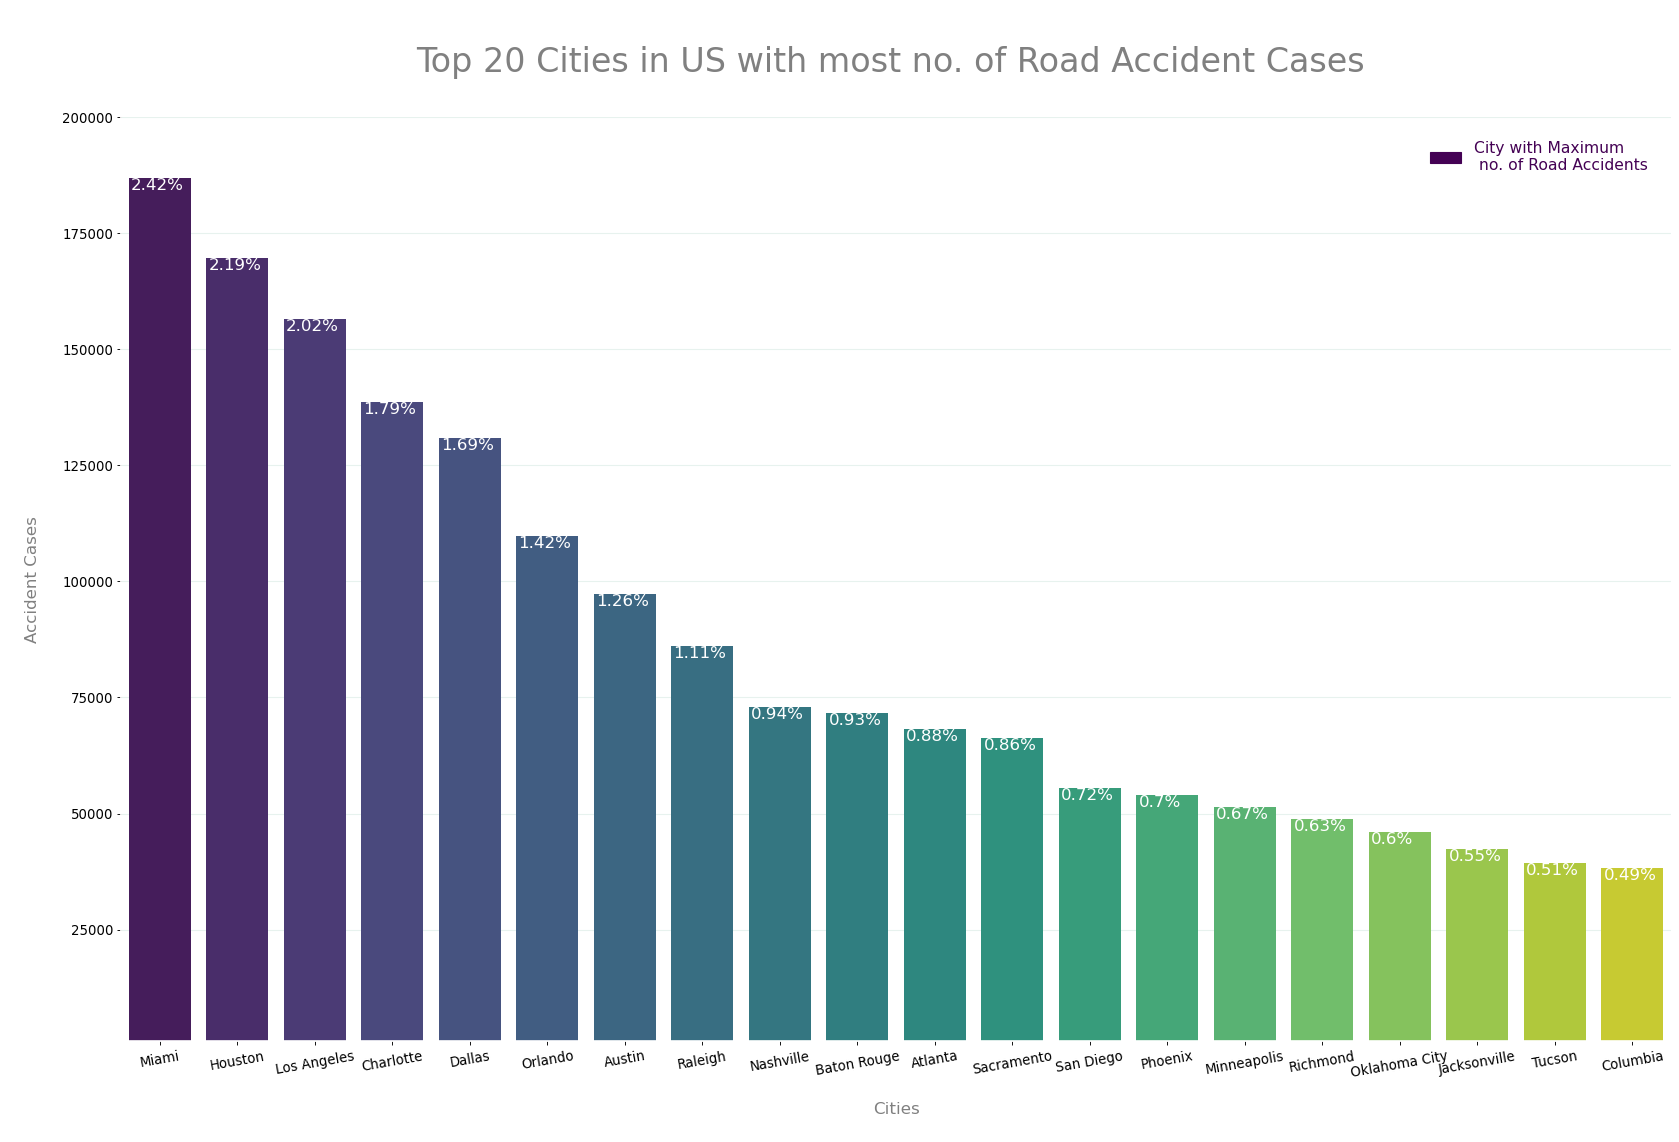

In [12]:
clrs = [matplotlib.colors.rgb2hex(cmap(i)) for i in range(cmap.N)]

fig, ax = plt.subplots(figsize = (25,15), dpi = 80)

ax=sns.barplot(y=top_20_cities['Accident Cases'], x=top_20_cities['city'], palette='viridis')

total = sum(city_df['Accident Cases'])
for i in ax.patches:
    ax.text(i.get_x()+.03, i.get_height()-2500, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15, color='white')

plt.title('\nTop 20 Cities in US with most no. of Road Accident Cases \n', size=30, color='grey')

plt.rcParams['font.family'] = "Microsoft JhengHei UI Light"
plt.rcParams['font.serif'] = ["Microsoft JhengHei UI Light"]

plt.ylim(1000, 200000)
plt.xticks(rotation=10, fontsize=12)
plt.yticks(fontsize=12)

ax.set_xlabel('\nCities\n', fontsize=15, color='grey')
ax.set_ylabel('\nAccident Cases\n', fontsize=15, color='grey')

for i in ['bottom', 'left']:
    ax.spines[i].set_color('white')
    ax.spines[i].set_linewidth(1.5)
    
right_side = ax.spines["right"]
right_side.set_visible(False)
top_side = ax.spines["top"]
top_side.set_visible(False)

ax.set_axisbelow(True)
ax.grid(color='#b2d6c7', linewidth=1, axis='y', alpha=.3)
MA = mpatches.Patch(color=clrs[0], label='City with Maximum\n no. of Road Accidents')
ax.legend(handles=[MA], prop={'size': 14}, loc='best', borderpad=1, 
          labelcolor=clrs[0], edgecolor='white');
plt.show()